In [8]:
import numpy as np
import mesh
import forwardProblem
import matplotlib.pyplot as plt

# EXEMPLOS BIBLIOTECA EDSON

ToDo:

- Implementar elemento 1D ( class LinearLineEdson() ) [elements.py]
- Implementar malha 1D ( class PointElectrodes1DMeshEdson() ) [mesh.py]
- Rodar exemplos 1D antigos e ver se bate
- Implementar problema direto (que deve funcionar com qualquer malha, não interessa se é 1D, 2D, com ou sem eletrodo...) [forward.py]

## Teste Tarefa unidimensional 
(class PointElectrodes1DMeshEdson()).

In [2]:
nome = '../../malhasMSH/unidimensional_100e_py.msh'

noh_eletrodos = [0,  10, 20, 30, 40, 50, 60, 70, 80, 90,  100]

MinhaMalha1D = mesh.PointElectrodes1DMeshEdson(noh_eletrodos, nome_msh=nome, altura1D = 0.02)
MinhaMalha1D.ReadMesh()

NumberOfElectrodes: 11
Reading ../../malhasMSH/unidimensional_100e_py.msh.

msh_physical_groups found (type line): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2].
Physical tags found (type line): [1 2].
MSH file with 100 elements and 101 nodes.
GndNode: 0
first five coordinates: [[0.   0.   0.  ]
 [0.01 0.   0.  ]
 [0.02 0.   0.  ]
 [0.03 0.   0.  ]
 [0.04 0.   0.  ]]
Altura1D: 0.02


In [3]:
meus_sigmas = {}
meus_sigmas[1] = 0.25
meus_sigmas[2] = 0.5
MinhaMalha1D.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

CHAVES recebidas em dic: [1, 2]


In [4]:
amplitude_corrente = 0.001
Pcorrente = np.zeros(MinhaMalha1D.NumberOfNodes)                    # Monta vetor de corrente
Pcorrente[0] = -amplitude_corrente                            # Nó de saída de corrente
Pcorrente[MinhaMalha1D.NumberOfElements] = amplitude_corrente                  # Nó de entrada de corrente    

fwd = forwardProblem.forward_problem(MinhaMalha1D, Pcorrente=Pcorrente)   # __init__ roda aqui


In [5]:
fwd.Solve()

Vetor de corrente: 
 [-0.001  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.001]
 Tensões medidas em todos os nós 
 [0.    0.002 0.004 0.006 0.008 0.01  0.012 0.014 0.016 0.018 0.02  0.022
 0.024 0.026 0.028 0.03  0.032 0.034 0.036 0.038 0.04  0.042 0.044 0.046
 0.048 0.05  0.052 0.054 0.056 0.058 0.06  0.062 0.064 0.066 0.068 0.07
 0.072 0.074 0.076 0.078 0.08  0.082 

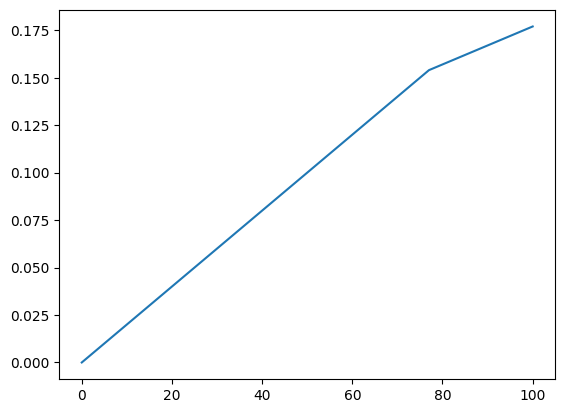

In [10]:
plt.plot(fwd.Vmedido)

## Testes com HUA

In [7]:
nome = '../../malhasMSH/circ2_tst_Hua_v2_2_lc_especial.msh'
#nome = '../malhasMSH/circ8_anom4_tst_Hua_v2_2_lc_especial.msh'

MinhaMalha = mesh.HuaElectrodes2DMeshEdson(2, nome_msh=nome, altura2D = 0.02)
MinhaMalha.ReadMesh() 

print(MinhaMalha.Elements[2])
print(f"Centroid: {MinhaMalha.Elements[2].Centroid}")
print(f"KGeo: \n{MinhaMalha.Elements[2].KGeo}")

meus_sigmas = {}
meus_sigmas[1000] = 0.1
meus_sigmas[5001] = 0.2
meus_sigmas[5002] = 0.2
MinhaMalha.SetSigmaPhysicaEntity(meus_sigmas) # Informando sigma (e já calculando o rho de cada elemento)

MinhaMalha.CalcKGlobal() # calculando KGlobal usando Sigmas

coordenadas = MinhaMalha.Coordinates
topologia = MinhaMalha.msh_topology

MinhaMalha.KGlobal

KGlobal =  MinhaMalha.KGlobal


print(f'n_nodes = {MinhaMalha.NumberOfNodes}')

Pcorrente = np.zeros(MinhaMalha.NumberOfNodes)                    # Monta vetor de corrente
Pcorrente[17] = -0.001                            # Nó de saída de corrente
Pcorrente[18] = 0.001                             # Nó de entrada de corrente

V_imposto = [[11, 0.0]]  

noh_eletrodos = [17,  18]

fwd = forwardProblem.forward_problem(MinhaMalha, V_imposto, noh_eletrodos, Pcorrente)   # __init__ roda aqui
####
nome_arquivo = 'ParaVernoGmsh'

N_padraoCC = 1

fwd.criar_arquivo_pos_2D(coordenadas, topologia, N_padraoCC, fwd.Vmedido, nome_arquivo)

fwd.abrir_Gmsh_pos(nome_arquivo, N_padraoCC)


Reading ../../malhasMSH/circ2_tst_Hua_v2_2_lc_especial.msh.

msh_physical_groups found (type triangle): [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000].
Physical tags found (type triangle): [1000].
Physical tags: lines: [5001 5002]; points: [10000]
2 electrodes found.
MSH file with 18 elements and 17 nodes.
ElectrodeNodes: [17 18]
26 Elements and 19 Nodes found on model.
GndNode: 10
Centroid: [ 0.11114379 -0.04717695  0.        ]
KGeo: 
[[ 0.00286201  0.00035101 -0.00321302]
 [ 0.00035101  0.03498348 -0.03533448]
 [-0.00321302 -0.03533448  0.0385475 ]]
CHAVES recebidas em dic: [1000, 5001, 5002]
n_nodes = 19
Vetor de corrente: 
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.    -0.001  0.001]
 Tensões medidos 
 [-3.61009650e-01 -4.01277025e-01 -4.14843998e-01 -4.01277025e-01
 -3.61009650e-01  5.37170934e-01  5.77438309e-01  5.91005282e-01
  5.77438309e-01  5.37170934e-01  8.

In [ ]:
#MinhaMalha.CalcKGlobal() # calculando KGlobal usando Sigmas

In [ ]:
#MinhaMalha.KGlobal